# Data Cleaning & Preprocessing for Providers Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('../data/raw/providers_data.csv')

## Remove extra spaces

In [3]:
df.columns = df.columns.str.strip()

## Strip spaces in string columns

In [4]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())

## Standardize text casing

In [5]:
df['Name'] = df['Name'].str.title()
df['Type'] = df['Type'].str.title()
df['City'] = df['City'].str.title()

## Convert Provider_ID to int

In [6]:
df['Provider_ID'] = pd.to_numeric(df['Provider_ID'], errors='coerce').astype('Int64')

## Drop rows missing essential fields

In [7]:
df = df.dropna(subset=['Provider_ID', 'Name', 'Type', 'City', 'Contact'])

## Remove duplicates based on Provider_ID

In [8]:
df = df.drop_duplicates(subset=['Provider_ID'])

## Standardize phone numbers

In [9]:
df['Contact'] = df['Contact'].str.replace(r'\s+', '', regex=True)
df['Contact'] = df['Contact'].str.replace(r'[^\d\+\-x]', '', regex=True)

# Feature Engineering

## Provider type code

In [10]:
df['Type_Code'] = df['Type'].astype('category').cat.codes

## City length metric 

In [11]:
df['City_Name_Length'] = df['City'].apply(len)

# Address length metric

In [12]:
df['Address_Length'] = df['Address'].apply(len)

## EDA Summaries

In [13]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Provider_ID       1000 non-null   Int64 
 1   Name              1000 non-null   object
 2   Type              1000 non-null   object
 3   Address           1000 non-null   object
 4   City              1000 non-null   object
 5   Contact           1000 non-null   object
 6   Type_Code         1000 non-null   int8  
 7   City_Name_Length  1000 non-null   int64 
 8   Address_Length    1000 non-null   int64 
dtypes: Int64(1), int64(2), int8(1), object(5)
memory usage: 64.6+ KB
None


In [14]:
print("\n--- Provider Type Counts ---")
print(df['Type'].value_counts())


--- Provider Type Counts ---
Type
Supermarket         262
Grocery Store       256
Restaurant          246
Catering Service    236
Name: count, dtype: int64


In [15]:
print("\n--- Top Cities ---")
print(df['City'].value_counts())


--- Top Cities ---
City
South Christopherborough    3
New Carol                   3
Lake Benjamin               2
South Thomas                2
Bradleyport                 2
                           ..
Manningshire                1
East Rossside               1
Joshuastad                  1
Stevenchester               1
Brendantown                 1
Name: count, Length: 963, dtype: int64


# Visualizations

In [16]:
sns.set(style="whitegrid")

## Provider type distribution

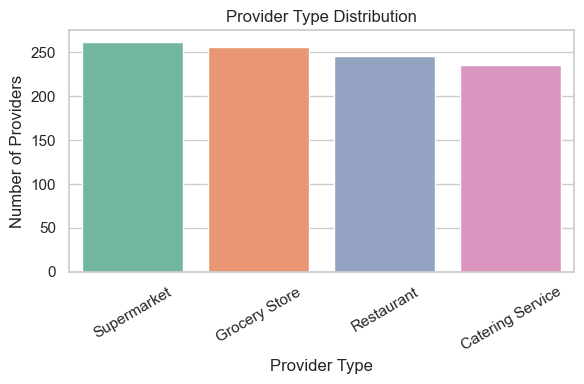

In [23]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index,hue = 'Type',legend = False, palette='Set2')
plt.title("Provider Type Distribution")
plt.xlabel("Provider Type")
plt.ylabel("Number of Providers")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("../reports/Visualizations/Providers_Data/Provider Type Distribution.png")
plt.show()

## Address length distribution

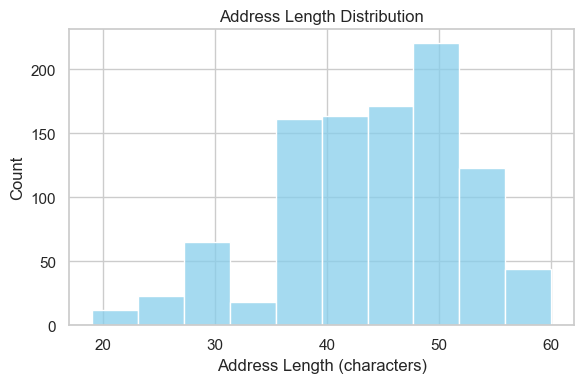

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df['Address_Length'], bins=10, kde=False, color='skyblue')
plt.title("Address Length Distribution")
plt.xlabel("Address Length (characters)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/Visualizations/Providers_Data/Address Length Distribution.png")
plt.show()

# Save cleaned dataset

In [26]:
df.to_csv("../data/processed/providers_data_clean.csv", index=False)
print("\nCleaned providers dataset saved as 'providers_data_clean.csv'")


Cleaned providers dataset saved as 'providers_data_clean.csv'
